# Kev's Stolen Dom's Notebook

hypothesis:

(01/09/20)
- Taxo ID [7,8] fall into Exec and consult
- taxo ID [3,4,5,9] fall into specialists
- Taxo ID [1,2,6] are further divided by experience level
        - we weren't satisfied on the results of this grouping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import ttest_ind, chisquare, chi2_contingency

import sys
sys.path.append('../')
import wrangle


In [2]:
df, dictdf = wrangle.wrangle_data()
df.head()

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_workshop,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,2,3,2,2,2,NaN,research-practice connections,NaN,research-practice connections,2
288,Academic,4,1.0,1,2,1,3,3,3,3,...,3,3,1,1,2,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2
294,Academic,4,1.0,3,3,1,3,1,3,3,...,2,2,2,2,2,NaN,NaN,NaN,Looking forward! \n,2
281,Academic,4,1.0,3,4,0,2,3,2,0,...,3,2,2,3,2,NaN,"Research design, innovative methods, communica...",NaN,NaN,2
280,Academic,4,1.0,3,3,0,1,1,3,2,...,3,2,1,2,2,You should consider the combination of confere...,NaN,NaN,NaN,2


- Checking freds nlp functions

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 284 to 2
Data columns (total 77 columns):
job_title                    726 non-null category
job_taxo                     726 non-null category
job_id                       723 non-null category
job_conduct_res              726 non-null int64
job_analyze_res              726 non-null int64
job_buy_res_report           726 non-null int64
job_manage_res_proj          726 non-null int64
job_observe_res              726 non-null int64
job_plan_res                 726 non-null int64
job_teach_res                726 non-null int64
job_advocate_res             726 non-null int64
job_hire_res_vendor          726 non-null int64
job_lead_res_team            726 non-null int64
num_employees                723 non-null category
num_researchers              722 non-null category
primary_industry             726 non-null category
types_res_used               690 non-null category
future_res                   609 non-null category
exp_con

In [4]:
df.shape

(726, 77)

In [5]:
# mat, vect = nlp.create_tfidf_matrix(df.best_event)

#### Exploration

In [6]:
#Quantitative columns
quant_cols = df.select_dtypes([int,float]).columns
quant_cols.to_list()

['job_conduct_res',
 'job_analyze_res',
 'job_buy_res_report',
 'job_manage_res_proj',
 'job_observe_res',
 'job_plan_res',
 'job_teach_res',
 'job_advocate_res',
 'job_hire_res_vendor',
 'job_lead_res_team',
 'exp_conduct_res',
 'exp_analyze_res',
 'exp_buy_res_report',
 'exp_manage_res_proj',
 'exp_observe_res',
 'exp_plan_res',
 'exp_teach_res',
 'exp_advocate_res',
 'exp_hire_res_vendor',
 'exp_lead_res_team',
 'learning_talks',
 'learning_read',
 'learning_meetup',
 'learning_workshop',
 'learning_conference',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'likely_conference',
 'likely_workshop',
 'factor_speaker',
 'factor_diverse_speak',
 'factor_topics',
 'factor_format_sessions',
 'factor_size',
 'factor_network',
 'factor_variety_attend',
 'factor_code',
 'factor_location',
 'factor_ability_to_pay',
 'session_keynote',
 'session_long_talk',
 'session_short_talk',
 'session_workshop',
 'session_network

In [7]:
#Jobs by taxo id
    #1 is UX researchers
    #2 is Developers
    #3 is Researcher/Scientist
    #4 is Academic/Students
    #5 is Planners?
    #6 is Design/Research Managers
    #7 is Consultans
    #8 is Executive
    #9 is misc
df.groupby(['job_taxo', 'job_title']).job_title.count()

job_taxo  job_title              
1         Principal UX Researcher     38
          Senior UX Researcher        82
          UX Researcher              167
2         Principal UX Designer       22
          Senior UX Designer          21
          UX Designer                 66
3         Analyst                      5
          Anthropologist               3
          Behavioral economist         1
          Ethnographer                 1
          Market Researcher            3
          Research Scientist           1
          Researcher                   9
4         Academic                    20
          Student                      3
5         Content Strategist           4
          Engineer                    13
          Information Architect       10
          Product Manager              7
          Service Designer            10
          Strategist                  21
6         Design Manager              54
          Research Manager            59
7         Consultant   

In [8]:
df.groupby(['persona_id','job_taxo']).persona_id.count()

persona_id  job_taxo
1           7            49
            8            45
2           3            23
            4            23
            5            65
            9            12
3           1           125
            2            22
            6            87
4           1           113
            2            47
            6            21
5           1            49
            2            40
            6             5
Name: persona_id, dtype: int64

In [9]:
df.persona_id.value_counts()

3    234
4    181
2    123
5     94
1     94
Name: persona_id, dtype: int64

In [10]:
exp_cols = ['exp_conduct_res', 'exp_analyze_res',
           'exp_buy_res_report', 'exp_manage_res_proj', 'exp_observe_res',
           'exp_plan_res', 'exp_teach_res', 'exp_advocate_res',
           'exp_hire_res_vendor', 'exp_lead_res_team']
df[exp_cols].mean(axis = 1)

resp_id
284    5.0
288    4.7
294    3.6
281    0.6
280    2.0
      ... 
869    0.6
879    1.0
136    2.4
74     1.5
2      1.3
Length: 726, dtype: float64

In [11]:
#show distributions of values


In [12]:
#establish features and target and split train and test data


In [13]:
x = quant_cols.drop(['likely_conference','learning_conference']).to_list()+['persona_id', 'job_taxo']
y = 'target'

In [14]:
# df['target'] = df[['learning_conference','likely_conference']].apply('mean', axis = 1)

In [15]:
learning_conference_int = np.array(df['learning_conference'] >1).astype('int32')
likely_conference_int = np.array(df['likely_conference']>1).astype('int32')
df['target'] = learning_conference_int + likely_conference_int

In [16]:

df['target']

resp_id
284    2
288    2
294    2
281    2
280    2
      ..
869    0
879    1
136    0
74     1
2      2
Name: target, Length: 726, dtype: int32

In [17]:
train, test = train_test_split(df[x+[y]].dropna(subset = [y]))

In [18]:
#1/14/20
#use svm or 
#form hypothesis and test them

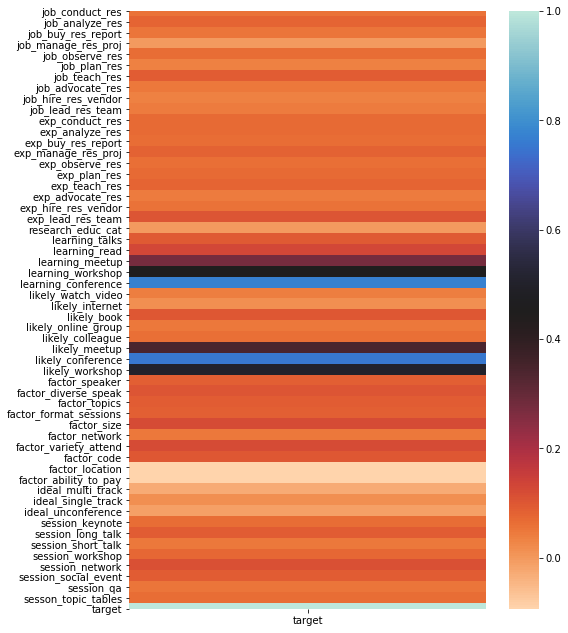

In [19]:
plt.figure(figsize=(8,11))
sns.heatmap(df.corr()[['target']], cmap = 'icefire_r')
plt.show()

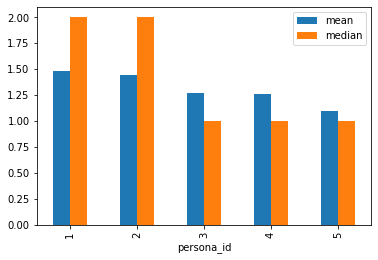

In [20]:
df.groupby('persona_id').target.agg(['mean', 'median']).plot.bar()
plt.show()
# df.groupby('persona_id').likely_conference.count()

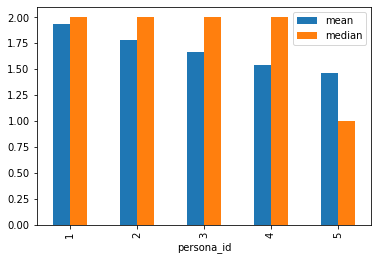

In [21]:
df.groupby('persona_id').learning_conference.agg(['mean', 'median']).plot.bar()
plt.show()


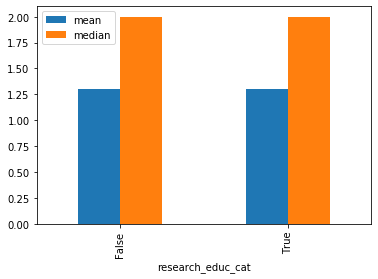

In [22]:
df.groupby('research_educ_cat').target.agg(['mean', 'median']).plot.bar()
plt.show()

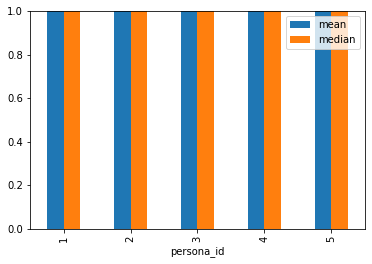

persona_id
1     94
2    123
3    234
4    181
5     94
Name: target, dtype: int64

In [23]:
df.groupby('persona_id').target.agg(['mean', 'median']).plot.bar()
plt.ylim(0,1)
plt.show()
df.groupby('persona_id').target.count()


persona_id 1


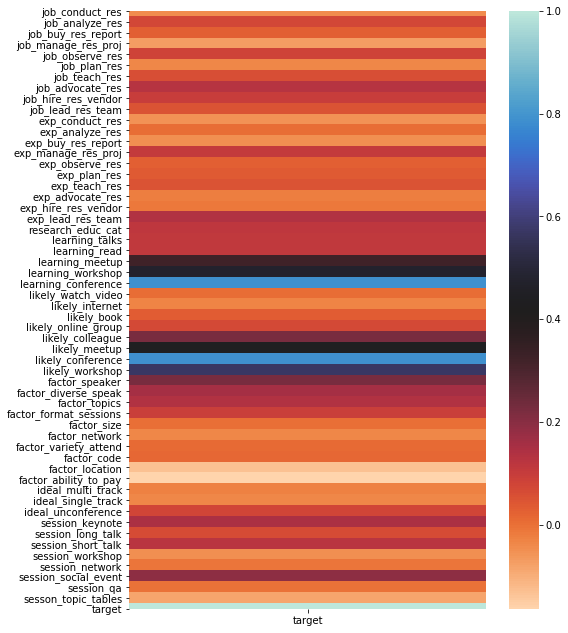

persona_id 2


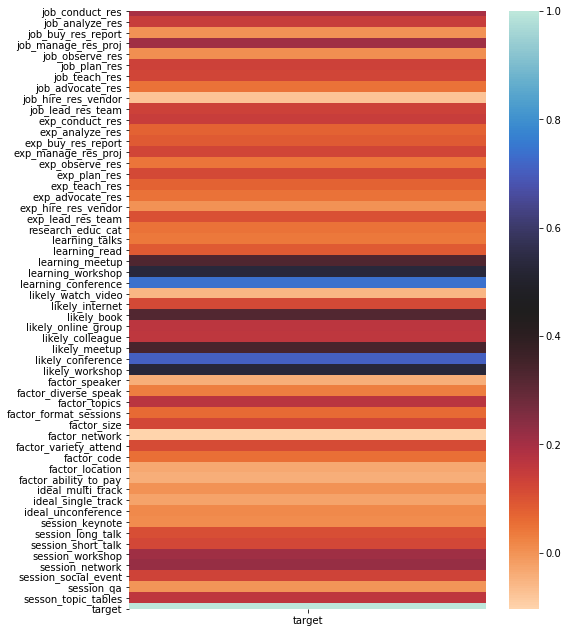

persona_id 3


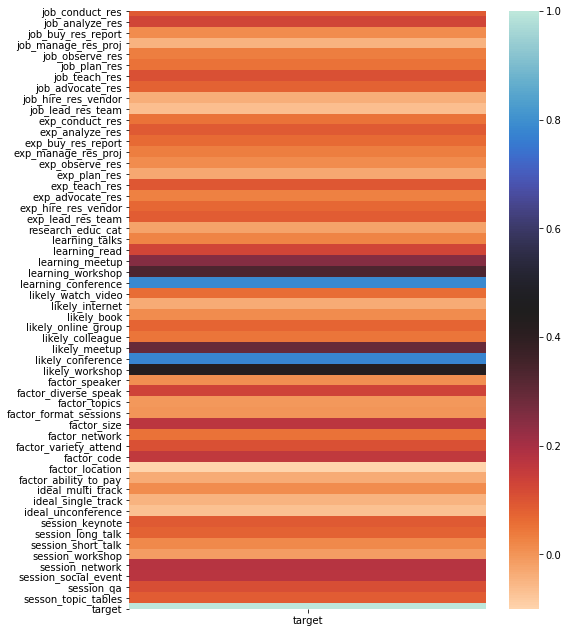

persona_id 4


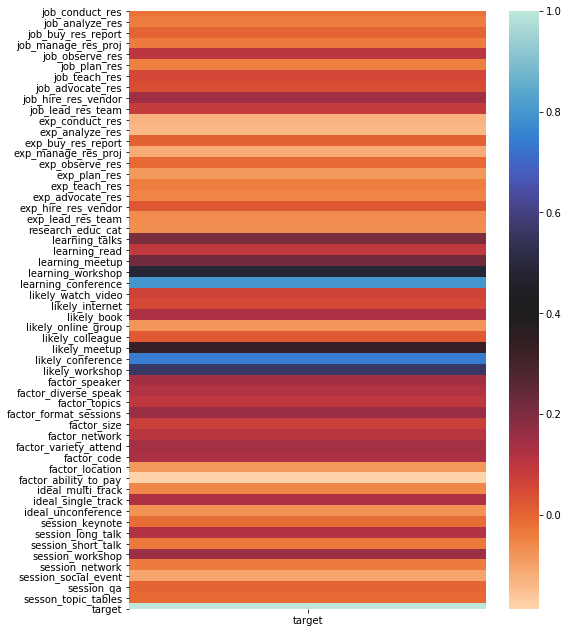

persona_id 5


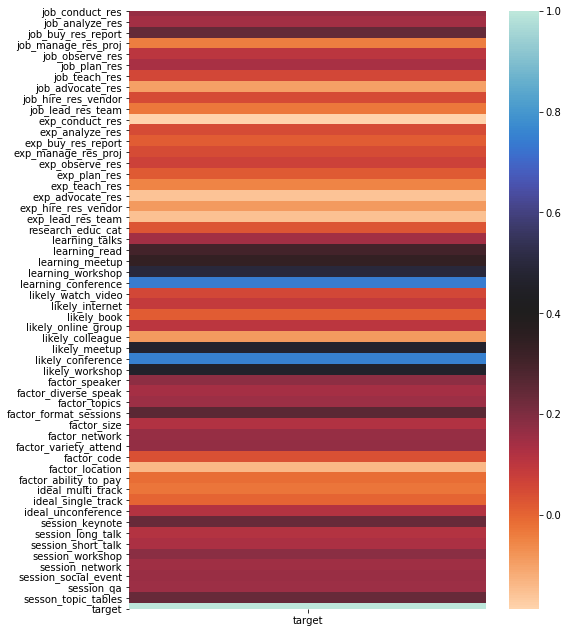

In [24]:
for i in set(df.persona_id.to_list()):
    print('persona_id',i)
    plt.figure(figsize=(8,11))
    sns.heatmap(df[df.persona_id==i].corr()[['target']], cmap = 'icefire_r')
    plt.show()

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_conduct_res,726.0,2.856749,1.025941,0.0,3.0,3.0,4.0,4.0
job_analyze_res,726.0,2.913223,0.939210,0.0,3.0,3.0,3.0,4.0
job_buy_res_report,726.0,0.402204,0.720686,0.0,0.0,0.0,1.0,4.0
job_manage_res_proj,726.0,2.600551,1.166285,0.0,2.0,3.0,3.0,4.0
job_observe_res,726.0,1.982094,1.134273,0.0,1.0,2.0,3.0,4.0
job_plan_res,726.0,2.931129,0.950177,0.0,3.0,3.0,4.0,4.0
job_teach_res,726.0,1.845730,1.236637,0.0,1.0,2.0,3.0,4.0
job_advocate_res,726.0,2.924242,1.056235,0.0,3.0,3.0,4.0,4.0
job_hire_res_vendor,726.0,0.776860,0.914143,0.0,0.0,1.0,1.0,4.0
job_lead_res_team,726.0,1.860882,1.486931,0.0,0.0,2.0,3.0,4.0


In [26]:
df.job_analyze_res

resp_id
284    2
288    2
294    3
281    4
280    3
      ..
869    3
879    4
136    4
74     3
2      3
Name: job_analyze_res, Length: 726, dtype: int64

In [27]:
def distplot_cols(df, cols):
    chk_cols = [col for col in cols if col in df.columns]
    for chk_col in chk_cols:
        plot_col = df[chk_col]
        use_bins = plot_col.nunique()
        print(f'Column: {chk_col}, {use_bins} unique values')
        print(plot_col.value_counts().sort_index())
        sns.distplot(plot_col, bins=use_bins, rug=True, rug_kws={"color": "b"}, 
                     kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                     hist_kws={"histtype": "step", "linewidth": 3,
                               "alpha": 1, "color": "r"}, norm_hist=True)
        plt.show()

Column: job_conduct_res, 5 unique values
0     17
1     99
2     42
3    381
4    187
Name: job_conduct_res, dtype: int64


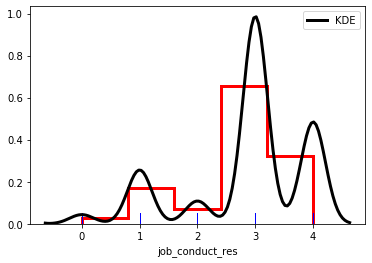

Column: job_analyze_res, 5 unique values
0     10
1     82
2     48
3    407
4    179
Name: job_analyze_res, dtype: int64


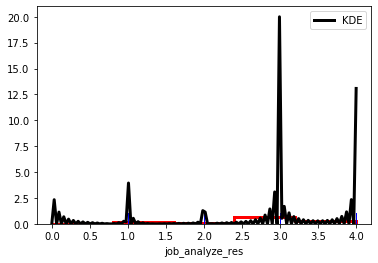

Column: job_buy_res_report, 5 unique values
0    506
1    171
2     32
3     11
4      6
Name: job_buy_res_report, dtype: int64


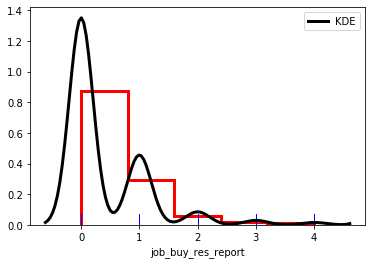

Column: job_manage_res_proj, 5 unique values
0     40
1    123
2     87
3    313
4    163
Name: job_manage_res_proj, dtype: int64


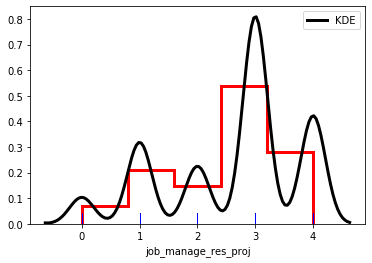

Column: job_observe_res, 5 unique values
0     53
1    257
2    123
3    236
4     57
Name: job_observe_res, dtype: int64


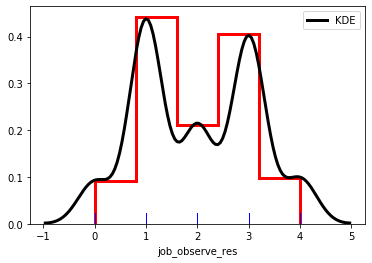

Column: job_plan_res, 5 unique values
0      9
1     79
2     63
3    377
4    198
Name: job_plan_res, dtype: int64


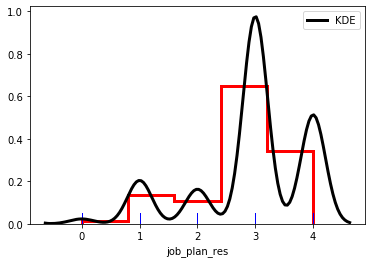

Column: job_teach_res, 5 unique values
0    108
1    237
2     98
3    225
4     58
Name: job_teach_res, dtype: int64


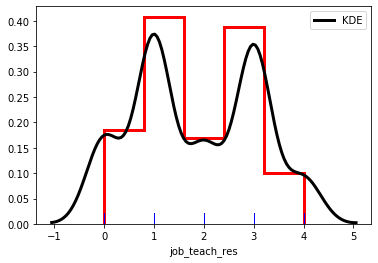

Column: job_advocate_res, 5 unique values
0     22
1     73
2     83
3    308
4    240
Name: job_advocate_res, dtype: int64


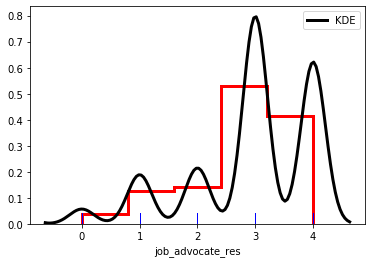

Column: job_hire_res_vendor, 5 unique values
0    329
1    298
2     36
3     58
4      5
Name: job_hire_res_vendor, dtype: int64


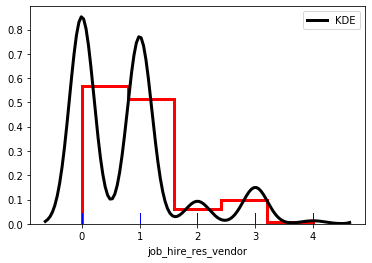

Column: job_lead_res_team, 5 unique values
0    187
1    155
2     99
3    142
4    143
Name: job_lead_res_team, dtype: int64


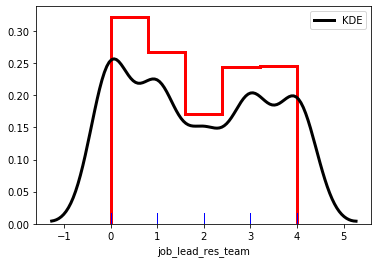

Column: exp_conduct_res, 6 unique values
0     23
1    105
2    126
3    104
4    125
5    243
Name: exp_conduct_res, dtype: int64


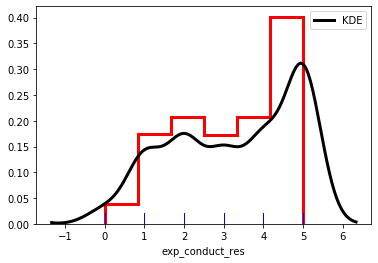

Column: exp_analyze_res, 6 unique values
0     21
1     99
2    123
3    113
4    121
5    249
Name: exp_analyze_res, dtype: int64


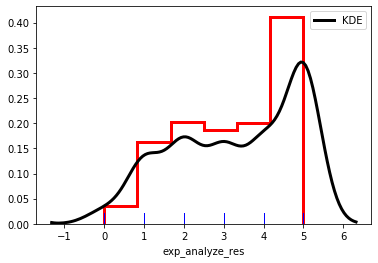

Column: exp_buy_res_report, 6 unique values
0    468
1     91
2     45
3     35
4     24
5     63
Name: exp_buy_res_report, dtype: int64


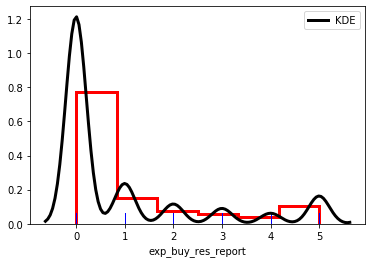

Column: exp_manage_res_proj, 6 unique values
0     76
1    163
2    128
3    103
4     96
5    160
Name: exp_manage_res_proj, dtype: int64


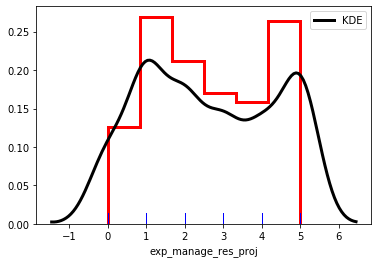

Column: exp_observe_res, 6 unique values
0     50
1    119
2    125
3     89
4    112
5    231
Name: exp_observe_res, dtype: int64


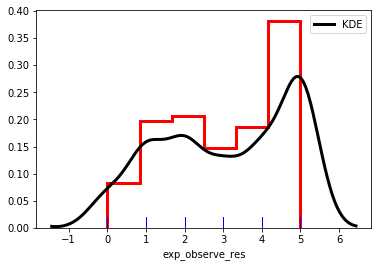

Column: exp_plan_res, 6 unique values
0     29
1    118
2    127
3    118
4    117
5    217
Name: exp_plan_res, dtype: int64


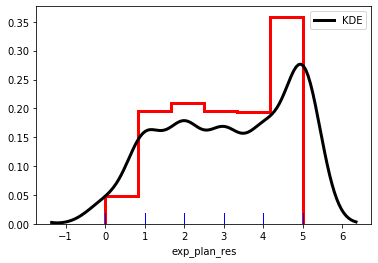

Column: exp_teach_res, 6 unique values
0    197
1    171
2    127
3     87
4     54
5     90
Name: exp_teach_res, dtype: int64


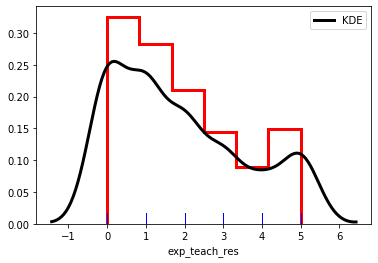

Column: exp_advocate_res, 6 unique values
0     64
1    126
2    132
3    101
4     98
5    205
Name: exp_advocate_res, dtype: int64


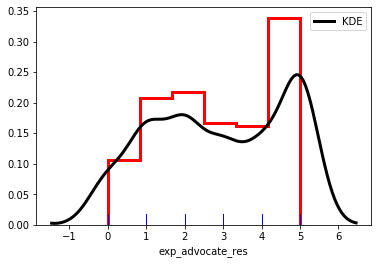

Column: exp_hire_res_vendor, 6 unique values
0    328
1    163
2     84
3     47
4     29
5     75
Name: exp_hire_res_vendor, dtype: int64


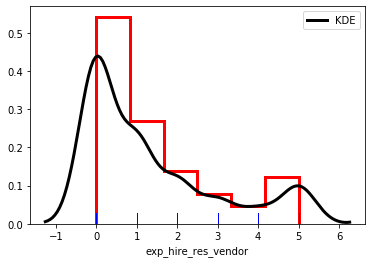

Column: exp_lead_res_team, 6 unique values
0    243
1    183
2    106
3     65
4     50
5     79
Name: exp_lead_res_team, dtype: int64


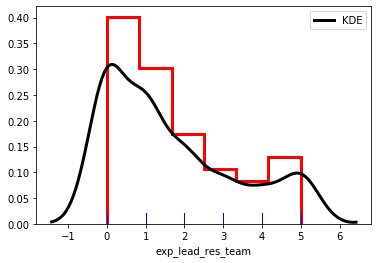

Column: learning_talks, 4 unique values
0     21
1    139
2    331
3    235
Name: learning_talks, dtype: int64


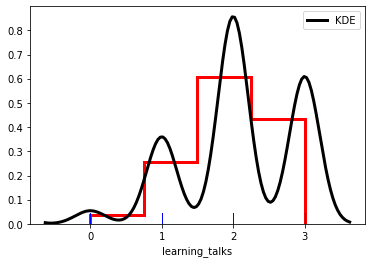

Column: learning_read, 4 unique values
0      2
1     31
2    179
3    514
Name: learning_read, dtype: int64


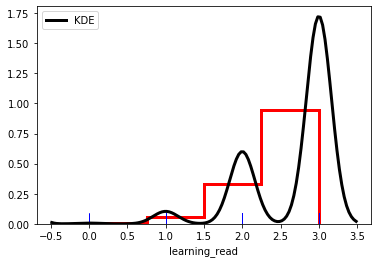

Column: learning_meetup, 4 unique values
0     38
1    226
2    304
3    158
Name: learning_meetup, dtype: int64


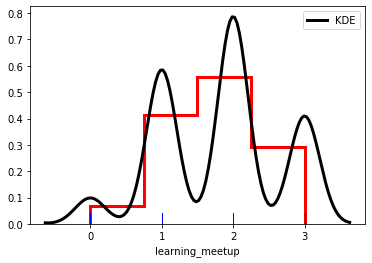

Column: learning_workshop, 4 unique values
0     74
1    309
2    284
3     59
Name: learning_workshop, dtype: int64


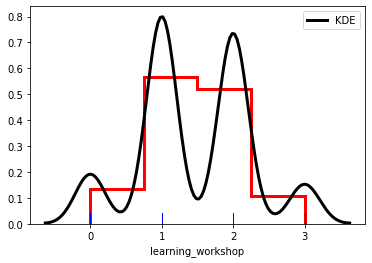

Column: likely_watch_video, 5 unique values
0     15
1     47
2    110
3    318
4    236
Name: likely_watch_video, dtype: int64


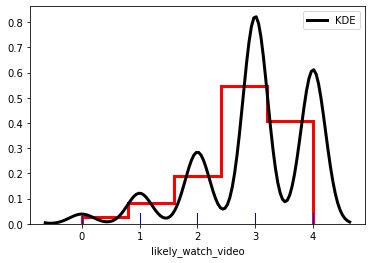

Column: likely_internet, 5 unique values
0      3
1     12
2     39
3    237
4    435
Name: likely_internet, dtype: int64


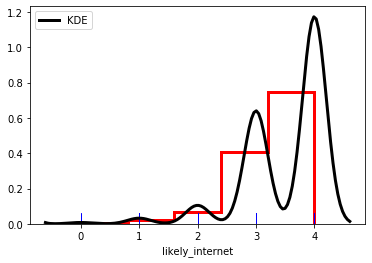

Column: likely_book, 5 unique values
0      4
1     26
2     80
3    281
4    335
Name: likely_book, dtype: int64


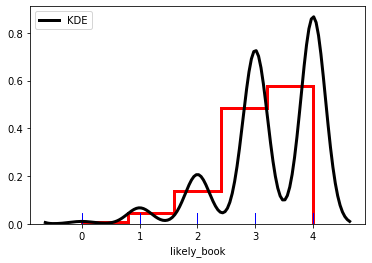

Column: likely_online_group, 5 unique values
0     68
1    191
2    194
3    161
4    112
Name: likely_online_group, dtype: int64


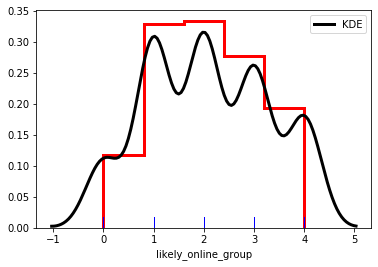

Column: likely_colleague, 5 unique values
0     16
1     41
2    113
3    274
4    282
Name: likely_colleague, dtype: int64


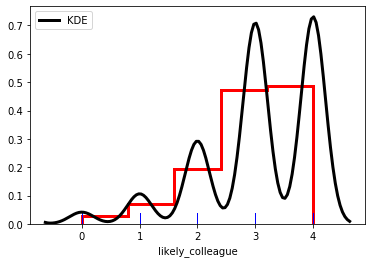

Column: likely_meetup, 5 unique values
0     49
1    168
2    202
3    201
4    106
Name: likely_meetup, dtype: int64


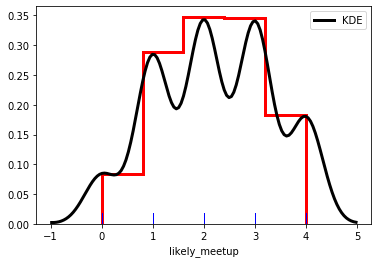

Column: likely_workshop, 5 unique values
0     33
1    145
2    187
3    249
4    112
Name: likely_workshop, dtype: int64


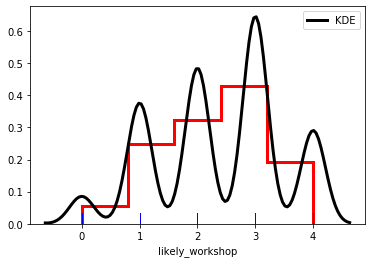

Column: factor_speaker, 5 unique values
0     54
1    170
2    140
3    274
4     88
Name: factor_speaker, dtype: int64


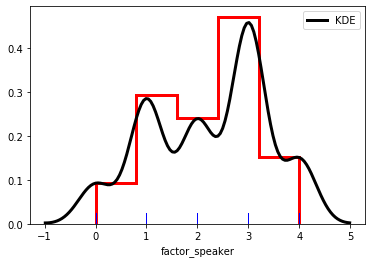

Column: factor_diverse_speak, 5 unique values
0     30
1     61
2    106
3    304
4    225
Name: factor_diverse_speak, dtype: int64


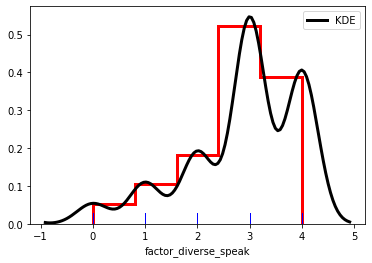

Column: factor_topics, 5 unique values
0      3
1      4
2     14
3    200
4    505
Name: factor_topics, dtype: int64


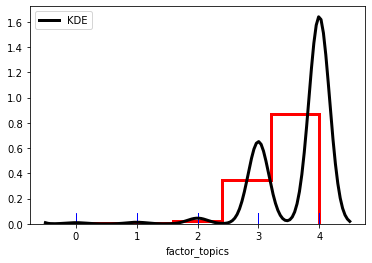

Column: factor_format_sessions, 5 unique values
0     12
1     51
2    185
3    317
4    161
Name: factor_format_sessions, dtype: int64


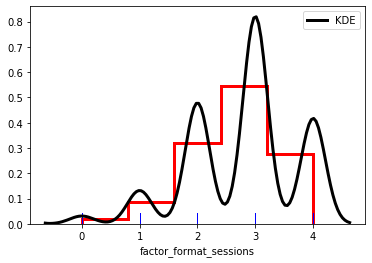

Column: factor_size, 5 unique values
0     56
1    160
2    193
3    210
4    107
Name: factor_size, dtype: int64


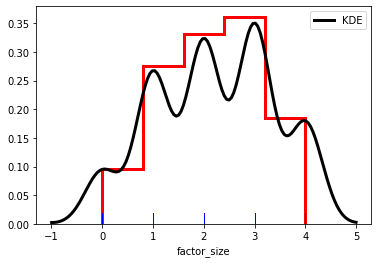

Column: factor_network, 5 unique values
0     80
1    146
2    254
3    187
4     59
Name: factor_network, dtype: int64


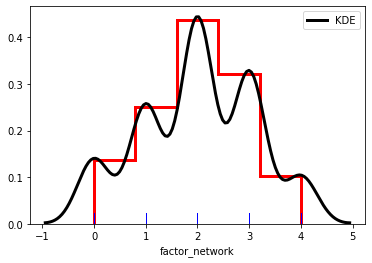

Column: factor_variety_attend, 5 unique values
0     86
1    148
2    221
3    201
4     70
Name: factor_variety_attend, dtype: int64


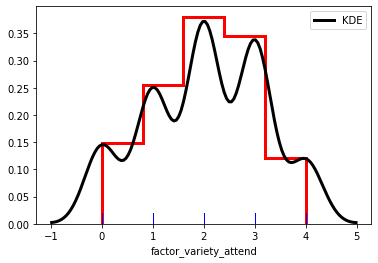

Column: factor_code, 5 unique values
0    135
1    128
2    219
3    160
4     84
Name: factor_code, dtype: int64


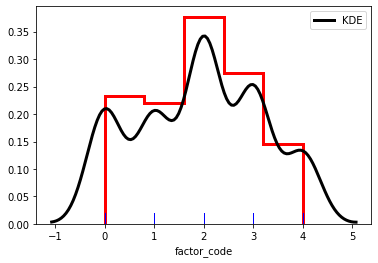

Column: factor_location, 5 unique values
0     17
1     61
2    113
3    289
4    246
Name: factor_location, dtype: int64


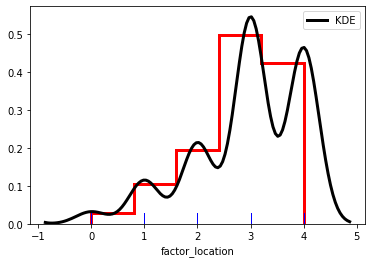

Column: factor_ability_to_pay, 5 unique values
0     17
1     34
2     57
3    198
4    420
Name: factor_ability_to_pay, dtype: int64


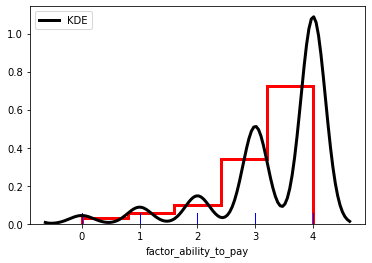

Column: session_keynote, 5 unique values
0     39
1     89
2     95
3    326
4    177
Name: session_keynote, dtype: int64


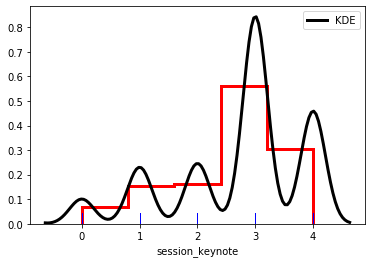

Column: session_long_talk, 5 unique values
0     22
1     67
2    124
3    367
4    146
Name: session_long_talk, dtype: int64


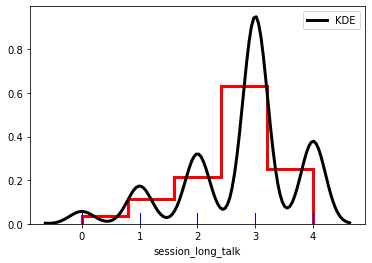

Column: session_short_talk, 5 unique values
0     54
1    115
2    171
3    301
4     85
Name: session_short_talk, dtype: int64


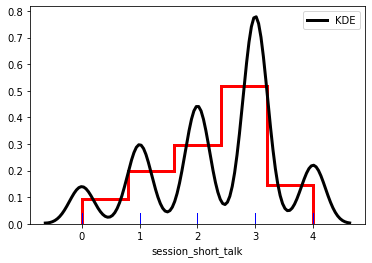

Column: session_workshop, 5 unique values
0     31
1     56
2     96
3    250
4    293
Name: session_workshop, dtype: int64


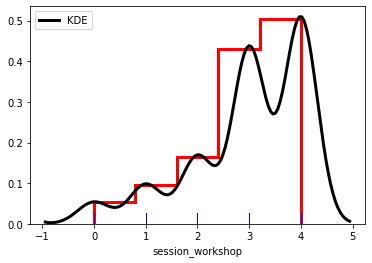

Column: session_network, 5 unique values
0     68
1    167
2    178
3    197
4    116
Name: session_network, dtype: int64


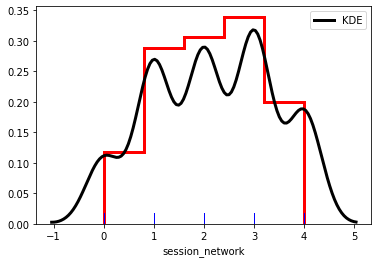

Column: session_social_event, 5 unique values
0    203
1    186
2    170
3    119
4     48
Name: session_social_event, dtype: int64


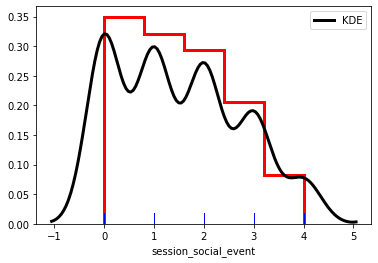

Column: session_qa, 5 unique values
0     75
1    149
2    207
3    203
4     92
Name: session_qa, dtype: int64


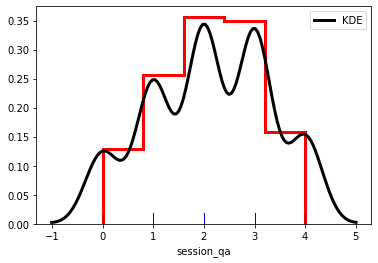

Column: sesson_topic_tables, 5 unique values
0     70
1     98
2    142
3    281
4    135
Name: sesson_topic_tables, dtype: int64


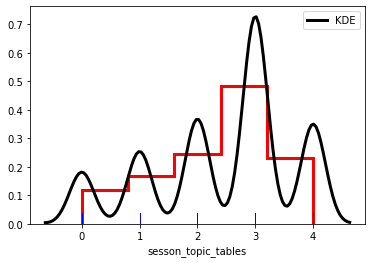

Column: persona_id, 5 unique values
1     94
2    123
3    234
4    181
5     94
Name: persona_id, dtype: int64


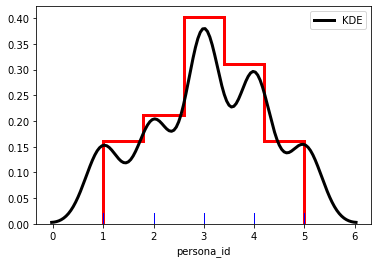

Column: job_taxo, 9 unique values
1    287
2    109
3     23
4     23
5     65
6    113
7     49
8     45
9     12
Name: job_taxo, dtype: int64


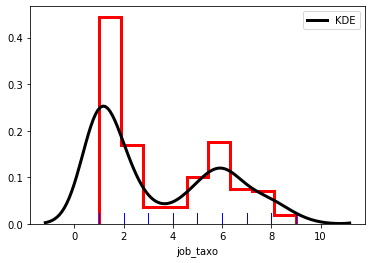

In [28]:
distplot_cols(df, x)

In [32]:
import itertools as it

In [41]:
# distplot_cols(dfrecode2, x)

In [42]:
def display_cats(col):

    display(df[col].value_counts().sort_index())
    display(dfrecode3[col].value_counts().sort_index())
    display(dfrecode2[col].value_counts().sort_index())

In [43]:
display_cats('job_plan_res')

0      9
1     79
2     63
3    377
4    198
Name: job_plan_res, dtype: int64

0.0     88
0.5     63
1.0    575
Name: job_plan_res, dtype: int64

0     88
1    638
Name: job_plan_res, dtype: int64

In [44]:
display_cats('job_manage_res_proj')

0     40
1    123
2     87
3    313
4    163
Name: job_manage_res_proj, dtype: int64

0.0    163
0.5     87
1.0    476
Name: job_manage_res_proj, dtype: int64

0    163
1    563
Name: job_manage_res_proj, dtype: int64

In [ ]:
chkchi2 = dfrecode.groupby(['target','job_manage_res_proj']).job_taxo.agg('count')
chkchi2

In [ ]:
chk_df = dfrecode
chk_col = 'job_manage_res_proj'
vs_col = 'target'

observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
observed

In [ ]:
# expected = pd.DataFrame()

# for transmission_group, t_prop in transmission_proportions.iteritems():
#     for drive_group, d_prop in drive_proportions.iteritems():
#         expected.loc[drive_group, transmission_group] = t_prop * d_prop

# expected.sort_index(inplace=True)
# expected

In [ ]:
chi2, p, degf, expected = chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
chk_df = dfrecode
chk_col = 'job_observe_res'
vs_col = 'target'

observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
display(observed)

chi2, p, degf, expected = chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

return chi2, p, degf, expected

In [ ]:
chk_df = dfrecode
chk_col = 'likely_workshop'
vs_col = 'target'

observed = pd.crosstab(index=chk_df[chk_col], columns=chk_df[vs_col])
display(observed)

chi2, p, degf, expected = chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

In [ ]:
chi2test, ptest = chisquare(dfrecode.job_manage_res_proj, dfrecode.target)

In [ ]:
chi2test

In [ ]:
ptest

In [ ]:
# chi2a, pa, dofa, expecteds = 

In [ ]:
def scale_col(df, col, tgt_values=3, col_min=None, col_max=None):
    chk = df[[col]].copy()
    chk_col = chk[col]
#     print('Min:', col_min, 'Max:', col_max)
    if col_min is None:
        col_min = chk_col.min()
#     print('Min:', col_min, 'Max:', col_max)
    if col_max is None:
        col_max = chk_col.max()
#     print('Min:', col_min, 'Max:', col_max)
    if col_min == col_max:
#         print('values not possible')
        return chk_col
    col_range = col_max - col_min
#     print('Range:', col_range)
    adj_col = np.array(chk_col) - col_min
    adj_col = np.around((adj_col * (tgt_values - 1)) / col_range)
    chk['adj'] = adj_col
    return chk.adj

In [ ]:
scale_job_teach_res = scale_col(df, 'job_teach_res')
scale_job_teach_res.value_counts().sort_index()

In [ ]:
df.job_teach_res.value_counts().sort_index()

In [ ]:
scale_exp_conduct_res = scale_col(df, 'exp_conduct_res')
scale_exp_conduct_res.value_counts().sort_index()

In [ ]:
df.exp_conduct_res.value_counts().sort_index()

In [ ]:
scale_learning_workshop = scale_col(df, 'learning_workshop')
scale_learning_workshop.value_counts().sort_index()

In [ ]:
df.learning_workshop.value_counts().sort_index()

In [ ]:
ttests = {}
row = {}
for i in range(1,6):
    for j in range(1,6):
        ttests[j] = ttest_ind(df[df.persona_id == i].target,df[(df.persona_id == j)].target, nan_policy='omit')[1]
    row[i] = ttests.copy()
sns.heatmap(pd.DataFrame(row))
plt.title('Statistical difference between persona groups of likelyhood to attend a conference')

In [ ]:
pd.DataFrame(row)

In [ ]:
tree = DecisionTreeRegressor(max_depth=1000, random_state=123)
tree.fit(train[x], train[y])
predicted = tree.predict(test[x]) 


In [ ]:
sns.scatterplot(predicted, test[y], alpha=.2)

In [ ]:
reg = LinearRegression()
reg.fit(train[x], train[y])
predicted = reg.predict(test[x])

In [ ]:
sns.scatterplot(predicted, test[y],alpha = .5)

In [ ]:
session_pref = (
    df
    .groupby(by='persona_id')[
        'session_keynote',
        'session_long_talk',
        'session_short_talk',
        'session_workshop',
        'session_network',
        'session_social_event',
        'session_qa',
        'sesson_topic_tables',
    ].mean()
)

In [ ]:
session_pref